In [5]:
import requests
import matplotlib.pyplot as plt
import numpy as np
import os
import time

days = range(1, 30)
hours = range(24)
minutes = [0, 15, 30, 45]

value_map = {
  0: 0,
  2.4039216: 32,
  2.992157: 24,
  3.5882354: 12,
  3.7882354: 6,
  1.6392157: 3,
  2.827451: 1.5,
  2.784314: 0.75,
  1.9960785: 0.25,
}

def convert_img(bytes):
  with open('img.png', 'wb') as f:
    f.write(bytes)
  img = plt.imread('img.png')
  img_sum = np.sum(img, axis=2)
  img_r = np.squeeze(img[:, :, 0])
  for k, v in value_map.items():
    img_sum[img_sum + img_r == k] = v
  return img_sum


def do_requests():
  for day in days:
    for hour in hours:
      for minute in minutes:
        file = f"2023-06-{day:02}T{hour:02}:{minute:02}:00Z.png"
        path = file.replace(':', '-')
        if os.path.exists(path):
          print(f"File {path} already exists - skipping")
          continue
        url = f'https://maps.consumer-digital.api.metoffice.gov.uk/wms_ob/single/high-res/rainfall_radar/{file}'
        print(f'Fetching {url}')
        bytes = requests.get(url)._content
        time.sleep(1)
        with open(path, 'wb') as f:
          f.write(bytes)

In [6]:
do_requests()

Fetching https://maps.consumer-digital.api.metoffice.gov.uk/wms_ob/single/high-res/rainfall_radar/2023-06-01T00:00:00Z.png
Fetching https://maps.consumer-digital.api.metoffice.gov.uk/wms_ob/single/high-res/rainfall_radar/2023-06-01T00:15:00Z.png
Fetching https://maps.consumer-digital.api.metoffice.gov.uk/wms_ob/single/high-res/rainfall_radar/2023-06-01T00:30:00Z.png
Fetching https://maps.consumer-digital.api.metoffice.gov.uk/wms_ob/single/high-res/rainfall_radar/2023-06-01T00:45:00Z.png
Fetching https://maps.consumer-digital.api.metoffice.gov.uk/wms_ob/single/high-res/rainfall_radar/2023-06-01T01:00:00Z.png
Fetching https://maps.consumer-digital.api.metoffice.gov.uk/wms_ob/single/high-res/rainfall_radar/2023-06-01T01:15:00Z.png
Fetching https://maps.consumer-digital.api.metoffice.gov.uk/wms_ob/single/high-res/rainfall_radar/2023-06-01T01:30:00Z.png
Fetching https://maps.consumer-digital.api.metoffice.gov.uk/wms_ob/single/high-res/rainfall_radar/2023-06-01T01:45:00Z.png
Fetching https:/

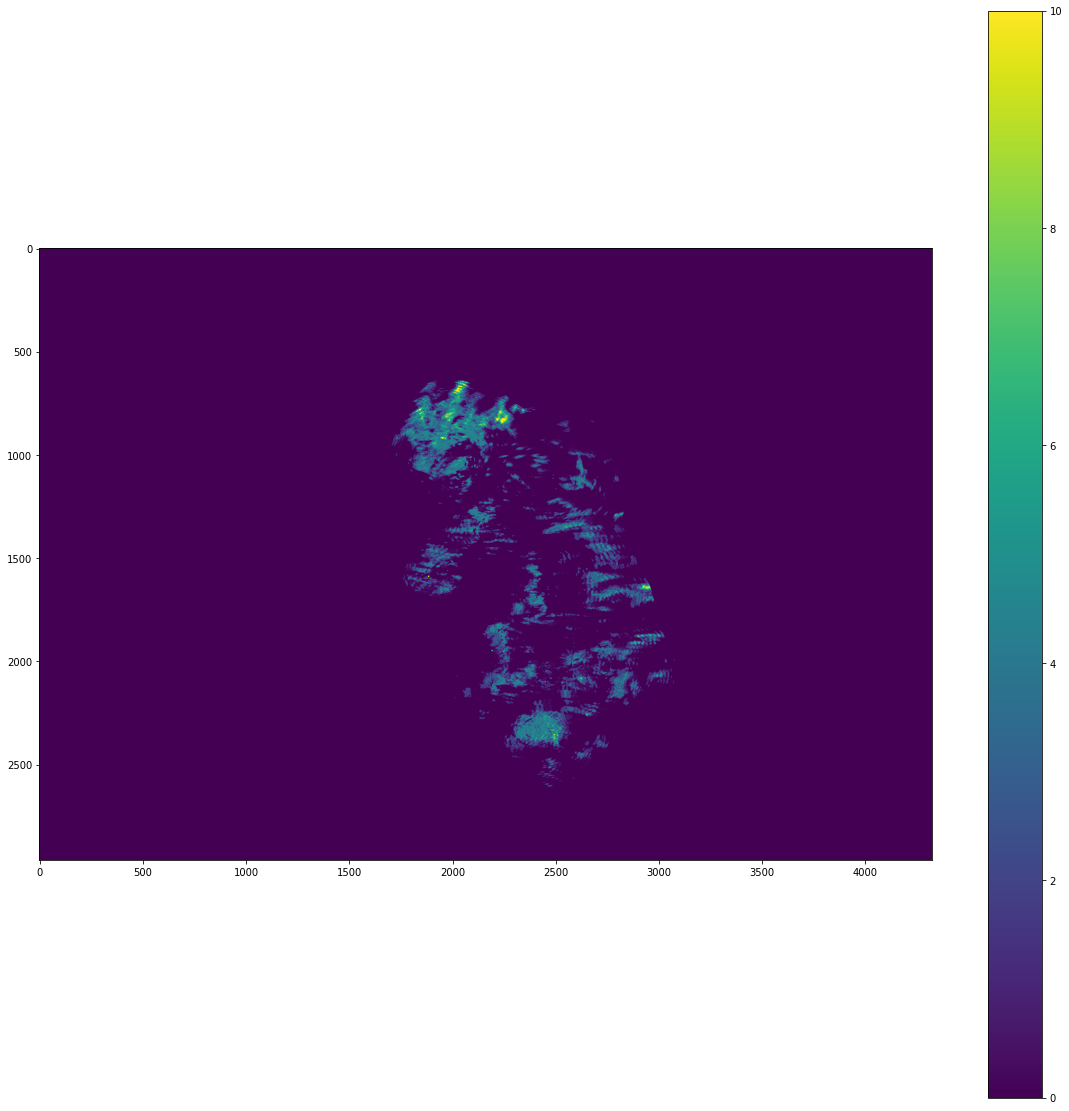

In [8]:
f, ax = plt.subplots(1,1, figsize=(20,20))

plt.imshow(rainfall_agg)
plt.colorbar()
plt.clim([0, 10])


In [1]:
import os

os.path.exists('img.png')

True